<a href="https://colab.research.google.com/github/kashafnaveed123/Vanilla-Autoencoder/blob/main/VanillaAutoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vanilla AutoEncoder**

In [7]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
from tensorflow import keras

In [12]:
(x_train,_),(x_test,_)=keras.datasets.mnist.load_data()
x_train=x_train/255.0
x_test=x_test/255.0

In [13]:
encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
decoder = keras.models.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(28*28, activation='sigmoid'),
    keras.layers.Reshape((28, 28))
])

In [15]:
stacked_autoencoder=keras.models.Sequential([encoder,decoder]);

In [16]:
stacked_autoencoder.compile(
    loss='mse',
    optimizer='adam'
)

In [17]:
history=stacked_autoencoder.fit(
    x_train,x_train,
    epochs=10,
    validation_data=[x_test,x_test]
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.0397 - val_loss: 0.0126
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 0.0120 - val_loss: 0.0096
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.0093 - val_loss: 0.0082
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.0080 - val_loss: 0.0075
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 0.0072 - val_loss: 0.0068
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.0067 - val_loss: 0.0064
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - loss: 0.0062 - val_loss: 0.0060
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.0059 - val_loss: 0.0058
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - loss: 0.0057 - val_loss: 0.0056
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 0.0055 - val_loss: 0.0053


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


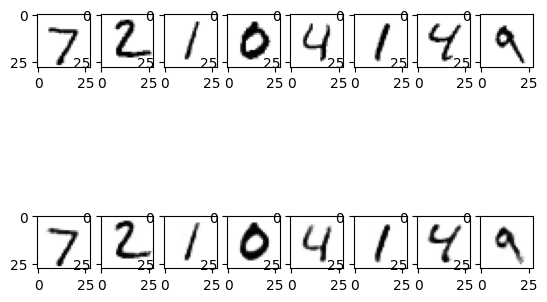

In [18]:
figsize=(20, 5)
for i in range(8):
    # Display original image
    # subplot(row,column,defines the position becuase index starts from 1)
    subplot(2, 8, i + 1)
    # Display reconstructed image
    pred = stacked_autoencoder.predict(x_test[i].reshape((1, 28, 28)))
    # cmap stands for color map and it is used to control the color of the displayed image
    # binary is the builtin-grayscale color map
    imshow(x_test[i], cmap="binary")

    # i + 8 +1 ==> this means that in first 8 positions thee is the input image and and theoutput shows after the 8 position
    # so, output is shows from 9 to 16  that's why we write i+8+1
    subplot(2, 8, i + 8 +1)
    imshow(pred.reshape((28, 28)), cmap="binary")

 We can also do this

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


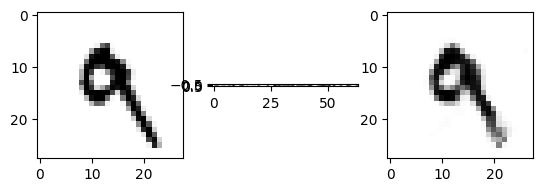

In [21]:
figsize=(10,5)
subplot(1,3,1)
imshow(x_test[i],cmap="binary")

# plot the latent vector representation from the encoder
subplot(1,3,2)
# predict the latent vector representation from the selected image
latent_vector=encoder.predict(x_test[i].reshape((1,28,28)))
imshow(latent_vector , cmap='binary')
# plot the reconstructed image obtained from the decoder
subplot(1,3,3)
# reconstucted image representation from the decoder
pred=decoder.predict(latent_vector)
imshow(pred.reshape((28,28)),cmap='binary')

# **Sparsity:**
 Sparsity means how many elements are zero in data structure
 **High sparsity** means many elements are zero
 **Low sparsity** means few are zero and mostly elements are non-zero.

In [22]:

# Calculate the sparsity constraints
sparsity_low=30/(28*28)
sparsity_high=1- 30/(28*28)

# print the values
print("sparsity_low",sparsity_low)
print("sparsity_high",sparsity_high)

sparsity_low 0.03826530612244898
sparsity_high 0.9617346938775511


This shows that it can compress 96%